## 泰坦尼克号存活预测--离散及连续型朴素贝叶斯分类器


In [1]:
import numpy as np    #用于数据处理
import pandas as pd   # 用于数据处理
import matplotlib.pyplot as plt   #用于画图
import matplotlib.patches as mpatches   # 用于画图
import seaborn as sns        #用于画图
import warnings
sns.set(style="darkgrid", palette="muted", color_codes=True)
%matplotlib inline
warnings.filterwarnings('ignore')

## 一.数据处理部分
### 1.读取以及可视化数据

In [2]:
train_df=pd.read_csv("./train.csv")   #训练数据
test_df=pd.read_csv("./test.csv")     #测试数据

#### 可视化部分训练数据

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 可视化部分测试数据

In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.查看数据信息

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


观察数据信息可以得知，在所有属性中，既有连续型的变量和离散型的变量。例如Age（年龄）和 Fare（票价）是float类型的连续型变量。Sex(性别）和Pclass（船票等级）等是离散型变量。

### 3.去除无意义的特征（PassageId, Name, Ticke, Cabin)
- 通过常识得知存活与否与乘客id，姓名、船票号相关性不大
- Cabin这一列缺失值太多



In [6]:
train_df=train_df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df=test_df.drop(labels=[ 'Name', 'Ticket', 'Cabin'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 4.填补缺失值并将object类型数值转换成离散型数值

In [7]:
train_df = train_df.fillna(train_df.mean()['Age':'Fare'])  # 根据年龄的均值填补年龄的缺失值
test_df = test_df.fillna(test_df.mean()['Age':'Fare'])  # 根据年龄的均值填补年龄的缺失值

def Age_2_category(age_array):
    """
    将age_array中的"male"替换成0,"female"替换成1
    """
    age_array=np.array(age_array)
    t_age_array=np.zeros_like(age_array)
    t_age_array[age_array=="male"]=0
    t_age_array[age_array=="female"]=1
    return pd.DataFrame(t_age_array)

def Embarked_2_category(embarked_array):
    """
    将Embarked_2_category中"S"替换成0;"C"替换成1；"Q"替换成2
    """
    embarked_array=np.array(embarked_array)
    t_embarked_array=np.zeros_like(embarked_array)
    t_embarked_array[embarked_array=="S"]=0
    t_embarked_array[embarked_array=="C"]=1
    t_embarked_array[embarked_array=="Q"]=2
    return pd.DataFrame(t_embarked_array)
train_df["Sex"]=Age_2_category(train_df["Sex"]).astype(int)
train_df["Embarked"]=Embarked_2_category(train_df["Embarked"]).astype(int)
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


#### 数据情况描述

In [8]:
train_df.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Sex,891.000000,0.352413,0.477990,0.000000,0.000000,0.000000,1.000000,1.000000
Age,891.000000,29.699118,13.002015,0.420000,22.000000,29.699118,35.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Embarked,891.000000,0.361392,0.635673,0.000000,0.000000,0.000000,1.000000,2.000000


#### 协方差矩阵

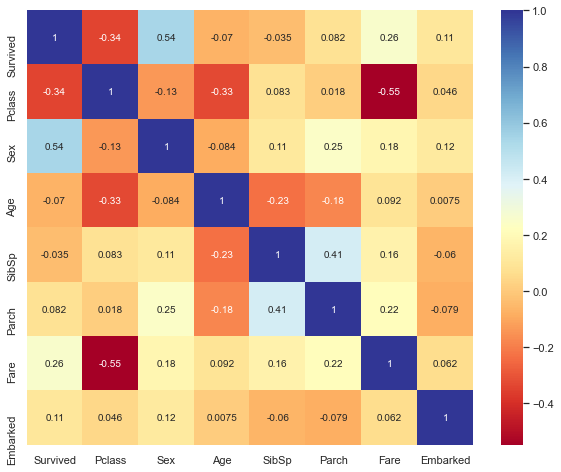

In [9]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlBu');

## 二.计算部分
初始化两个字典，将计算得到的先验和后验分别保存prior_dict和posterior_dict

In [10]:
prior_dict={}
posterior_dict={}
total_num=len(np.array(train_df))   ## 数据数量

### 离散型变量
#### 1.Survived(存活情况)
##### 需要计算出 $p(Survived)$ 以及 $ p(NotSurvived)$


0    549
1    342
Name: Survived, dtype: int64

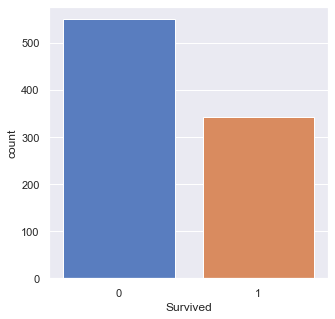

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='Survived')
pd.value_counts(train_df["Survived"])

0代表未幸存 1代表存活
所以:$$p(Survived)= 549/(549+342) $$
$$p(NotSurvived)= 342/(549+342) $$

In [12]:
prior_dict["NotSurvived"]=549/(total_num)
prior_dict["Survived"]=342/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161, 'Survived': 0.3838383838383838}

### 2.Pclass(船票等级）
#### 需要计算出先验概率$p(Pclass-1), p(Pclass-2),p(Pclass-3)$
#### 需要计算出条件概率$p(Pclass-1|Survived), p(Pclass-2|Survived),p(Pclass-3|Survived)，p(Pclass-1|NotSurvived), p(Pclass-2|NotSurvived),p(Pclass-3|NotSurvived)$

3    491
1    216
2    184
Name: Pclass, dtype: int64

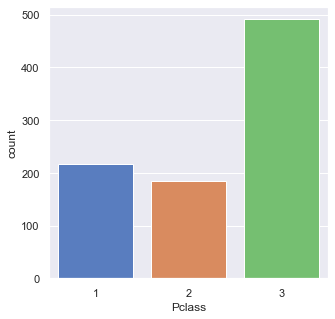

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='Pclass')
pd.value_counts(train_df["Pclass"])

In [14]:
prior_dict["Pclass-1"]=216/(total_num)
prior_dict["Pclass-2"]=184/(total_num)
prior_dict["Pclass-3"]=491/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161,
 'Survived': 0.3838383838383838,
 'Pclass-1': 0.24242424242424243,
 'Pclass-2': 0.20650953984287318,
 'Pclass-3': 0.5510662177328844}

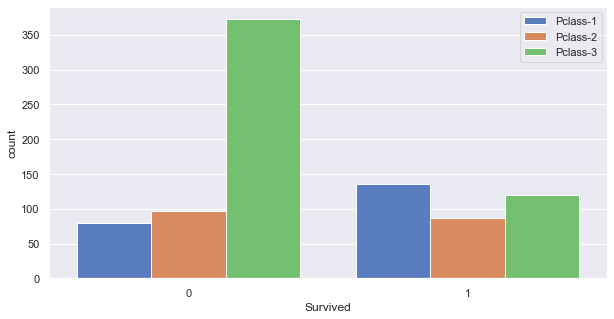

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x='Survived',hue='Pclass',)
plt.legend(["Pclass-1","Pclass-2","Pclass-3"])
plt.show()

In [16]:
Pclass_Survived_Tab=pd.crosstab(train_df["Survived"],train_df["Pclass"],margins = True)
Pclass_Survived_Tab

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [17]:
posterior_dict["Pclass-1|NotSurvived"]=Pclass_Survived_Tab[1][0]/Pclass_Survived_Tab["All"][0]
posterior_dict["Pclass-2|NotSurvived"]=Pclass_Survived_Tab[2][0]/Pclass_Survived_Tab["All"][0]
posterior_dict["Pclass-3|NotSurvived"]=Pclass_Survived_Tab[3][0]/Pclass_Survived_Tab["All"][0]
posterior_dict["Pclass-1|Survived"]=Pclass_Survived_Tab[1][1]/Pclass_Survived_Tab["All"][1]
posterior_dict["Pclass-2|Survived"]=Pclass_Survived_Tab[2][1]/Pclass_Survived_Tab["All"][1]
posterior_dict["Pclass-3|Survived"]=Pclass_Survived_Tab[3][1]/Pclass_Survived_Tab["All"][1]
posterior_dict

{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269}

### 2.Sex(性别）
#### 需要计算出先验概率$p(female), p(male)$
#### 需要计算出条件概率$p(female|Survived), p(male|Survived)，p(female|NotSurvived), p(male|NotSurvived)$

0    577
1    314
Name: Sex, dtype: int64

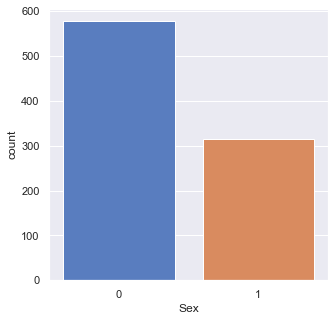

In [18]:
#"male"替换成0,"female"替换成1
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='Sex')
Sex_tab=pd.value_counts(train_df["Sex"])
Sex_tab

0代表男性 1代表女性

In [19]:
prior_dict["female"]=Sex_tab[1]/(total_num)
prior_dict["male"]=Sex_tab[0]/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161,
 'Survived': 0.3838383838383838,
 'Pclass-1': 0.24242424242424243,
 'Pclass-2': 0.20650953984287318,
 'Pclass-3': 0.5510662177328844,
 'female': 0.35241301907968575,
 'male': 0.6475869809203143}

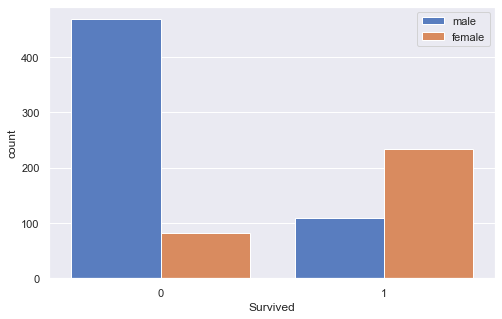

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Survived',hue='Sex',)
plt.legend(["male","female"])
plt.show()

In [21]:
Sex_Survived_Tab=pd.crosstab(train_df["Survived"],train_df["Sex"],margins = True)
Sex_Survived_Tab

Sex,0,1,All
Survived,,,
0,468,81,549
1,109,233,342
All,577,314,891


In [22]:
posterior_dict["male|NotSurvived"]=Sex_Survived_Tab[0][0]/Sex_Survived_Tab["All"][0]
posterior_dict["female|NotSurvived"]=Sex_Survived_Tab[1][0]/Sex_Survived_Tab["All"][0]
posterior_dict["male|Survived"]=Sex_Survived_Tab[0][1]/Sex_Survived_Tab["All"][1]
posterior_dict["female|Survived"]=Sex_Survived_Tab[1][1]/Sex_Survived_Tab["All"][1]
posterior_dict

{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269,
 'male|NotSurvived': 0.8524590163934426,
 'female|NotSurvived': 0.14754098360655737,
 'male|Survived': 0.31871345029239767,
 'female|Survived': 0.6812865497076024}

### 3.SibSp(兄弟姐妹以及配偶在船数量）
#### 需要计算出先验概率$p(SibSp-0), p(SibSp-1),p(SibSp-2),p(SibSp-3),p(SibSp-4),p(SibSp-5),p(SibSp-8)$
#### 需要计算出条件概率$p(SibSp-0|Survived), p(SibSp-1|Survived),p(SibSp-2|Survived),p(SibSp-3|Survived),p(SibSp-4|Survived),p(SibSp-5|Survived),p(SibSp-8|Survived)$以及$p(SibSp-0|NotSurvived), p(SibSp-1|NotSurvived),p(SibSp-2|NotSurvived),p(SibSp-3|NotSurvived),p(SibSp-4|NotSurvived),p(SibSp-5|NotSurvived),p(SibSp-8|NotSurvived)$


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

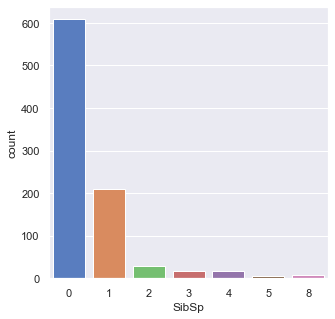

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='SibSp')
Sibsp_tab=pd.value_counts(train_df["SibSp"])
Sibsp_tab

In [24]:
for i in [0,1,2,3,4,5,8]:
    prior_dict["SibSp-{}".format(i)]=Sibsp_tab[i]/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161,
 'Survived': 0.3838383838383838,
 'Pclass-1': 0.24242424242424243,
 'Pclass-2': 0.20650953984287318,
 'Pclass-3': 0.5510662177328844,
 'female': 0.35241301907968575,
 'male': 0.6475869809203143,
 'SibSp-0': 0.6823793490460157,
 'SibSp-1': 0.2345679012345679,
 'SibSp-2': 0.031425364758698095,
 'SibSp-3': 0.017957351290684626,
 'SibSp-4': 0.020202020202020204,
 'SibSp-5': 0.005611672278338945,
 'SibSp-8': 0.007856341189674524}

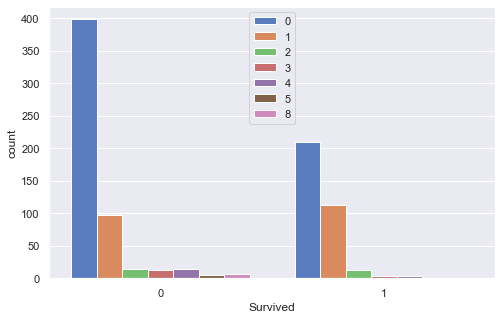

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Survived',hue='SibSp')
plt.legend(["0","1","2","3","4","5","8"])
plt.show()


In [26]:
SibSp_Survived_Tab=pd.crosstab(train_df["Survived"],train_df["SibSp"],margins = True)
SibSp_Survived_Tab

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


In [27]:
for i in [0,1,2,3,4,5,8]:
    posterior_dict["SibSp-{}|NotSurvived".format(i)]=SibSp_Survived_Tab[i][0]/SibSp_Survived_Tab["All"][0]
for i in [0,1,2,3,4,5,8]:
    posterior_dict["SibSp-{}|Survived".format(i)]=SibSp_Survived_Tab[i][1]/SibSp_Survived_Tab["All"][1]
posterior_dict

{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269,
 'male|NotSurvived': 0.8524590163934426,
 'female|NotSurvived': 0.14754098360655737,
 'male|Survived': 0.31871345029239767,
 'female|Survived': 0.6812865497076024,
 'SibSp-0|NotSurvived': 0.7249544626593807,
 'SibSp-1|NotSurvived': 0.1766848816029144,
 'SibSp-2|NotSurvived': 0.0273224043715847,
 'SibSp-3|NotSurvived': 0.02185792349726776,
 'SibSp-4|NotSurvived': 0.0273224043715847,
 'SibSp-5|NotSurvived': 0.009107468123861567,
 'SibSp-8|NotSurvived': 0.012750455373406194,
 'SibSp-0|Survived': 0.6140350877192983,
 'SibSp-1|Survived': 0.32748538011695905,
 'SibSp-2|Survived': 0.038011695906432746,
 'SibSp-3|Survived': 0.011695906432748537,
 'SibSp-4|Survived': 0.008771929824561403,
 'SibSp-5|Survived': 0.0,
 'SibSp-8|Survived': 0.

### 4.Parch(父母/子女在船数量）
#### 需要计算出先验概率$p(Parch-0),p(Parch-1),p(Parch-2),p(Parch-3),p(Parch-4),p(Parch-5),p(Parch-6)$
#### 需要计算出条件概率$p(Parch-0||NotSurvived),p(Parch-1|NotSurvived),p(Parch-2|NotSurvived),p(Parch-3|NotSurvived),p(Parch-4|NotSurvived),p(Parch-5|NotSurvived),p(Parch-6|NotSurvived)$以及$p(Parch-0||Survived),p(Parch-1|Survived),p(Parch-2|Survived),p(Parch-3|Survived),p(Parch-4|Survived),p(Parch-5|Survived),p(Parch-6|Survived)$


0    324
1     52
2     33
3      3
4      2
9      2
5      1
6      1
Name: Parch, dtype: int64

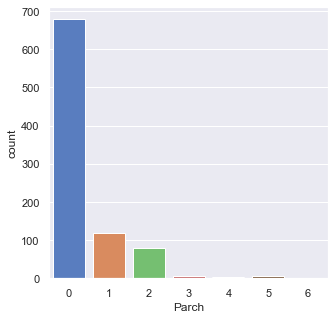

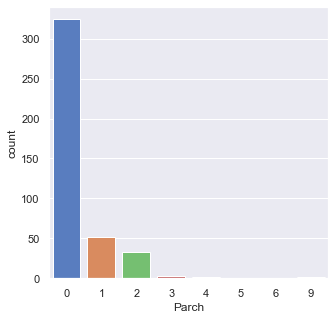

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='Parch')
Parch_tab=pd.value_counts(train_df["Parch"])
Parch_tab
plt.figure(figsize=(5,5))
sns.countplot(data=test_df,x='Parch')
Parch_tab=pd.value_counts(test_df["Parch"])
Parch_tab

In [29]:
for i in [0,1,2,3,4,5,6]:
    prior_dict["Parch-{}".format(i)]=Parch_tab[i]/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161,
 'Survived': 0.3838383838383838,
 'Pclass-1': 0.24242424242424243,
 'Pclass-2': 0.20650953984287318,
 'Pclass-3': 0.5510662177328844,
 'female': 0.35241301907968575,
 'male': 0.6475869809203143,
 'SibSp-0': 0.6823793490460157,
 'SibSp-1': 0.2345679012345679,
 'SibSp-2': 0.031425364758698095,
 'SibSp-3': 0.017957351290684626,
 'SibSp-4': 0.020202020202020204,
 'SibSp-5': 0.005611672278338945,
 'SibSp-8': 0.007856341189674524,
 'Parch-0': 0.36363636363636365,
 'Parch-1': 0.058361391694725026,
 'Parch-2': 0.037037037037037035,
 'Parch-3': 0.003367003367003367,
 'Parch-4': 0.002244668911335578,
 'Parch-5': 0.001122334455667789,
 'Parch-6': 0.001122334455667789}

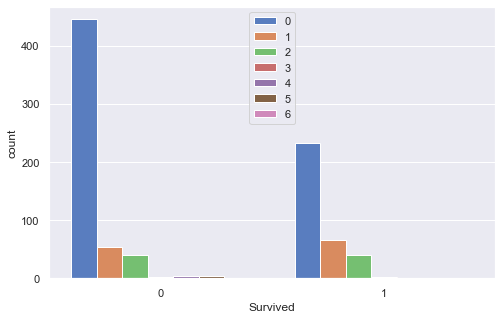

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Survived',hue='Parch')
plt.legend(["0","1","2","3","4","5","6"])
plt.show()

In [31]:
Parch_Survived_Tab=pd.crosstab(train_df["Survived"],train_df["Parch"],margins = True)
Parch_Survived_Tab

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


In [32]:
for i in [0,1,2,3,4,5,6]:
    posterior_dict["Parch-{}|NotSurvived".format(i)]=Parch_Survived_Tab[i][0]/Parch_Survived_Tab["All"][0]
for i in [0,1,2,3,4,5,6]:
    posterior_dict["Parch-{}|Survived".format(i)]=Parch_Survived_Tab[i][1]/Parch_Survived_Tab["All"][1]
posterior_dict

{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269,
 'male|NotSurvived': 0.8524590163934426,
 'female|NotSurvived': 0.14754098360655737,
 'male|Survived': 0.31871345029239767,
 'female|Survived': 0.6812865497076024,
 'SibSp-0|NotSurvived': 0.7249544626593807,
 'SibSp-1|NotSurvived': 0.1766848816029144,
 'SibSp-2|NotSurvived': 0.0273224043715847,
 'SibSp-3|NotSurvived': 0.02185792349726776,
 'SibSp-4|NotSurvived': 0.0273224043715847,
 'SibSp-5|NotSurvived': 0.009107468123861567,
 'SibSp-8|NotSurvived': 0.012750455373406194,
 'SibSp-0|Survived': 0.6140350877192983,
 'SibSp-1|Survived': 0.32748538011695905,
 'SibSp-2|Survived': 0.038011695906432746,
 'SibSp-3|Survived': 0.011695906432748537,
 'SibSp-4|Survived': 0.008771929824561403,
 'SibSp-5|Survived': 0.0,
 'SibSp-8|Survived': 0.

### 5.Embarked(乘客登船地点）
#### Embarked_2_category中"S"替换成0;"C"替换成1；"Q"替换成2
#### C = Cherbourg, Q = Queenstown, S = Southampton
#### 需要计算出先验概率$p(Embarked-0), p(Embarked-1)，p(Embarked-2)$
#### 需要计算出条件概率$p(Embarked-0|Survived), p(Embarked-1|Survived)，p(Embarked-2|Survived)$以及$p(Embarked-0|NotSurvived), p(Embarked-1|NotSurvived)，p(Embarked-2|NotSurvived)$


0    646
1    168
2     77
Name: Embarked, dtype: int64

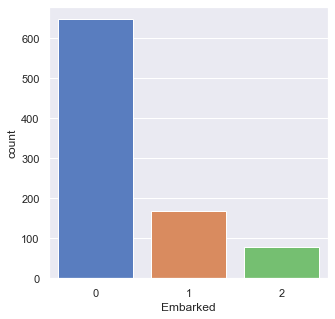

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df,x='Embarked')
Embarked_tab=pd.value_counts(train_df["Embarked"])
Embarked_tab

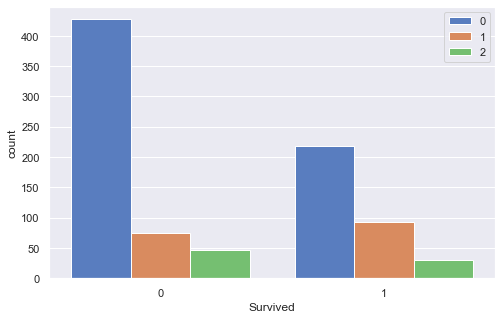

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Survived',hue='Embarked')
plt.legend(["0","1","2"])

In [35]:
for i in [0,1,2]:
    prior_dict["Embarked-{}".format(i)]=Embarked_tab[i]/(total_num)
prior_dict

{'NotSurvived': 0.6161616161616161,
 'Survived': 0.3838383838383838,
 'Pclass-1': 0.24242424242424243,
 'Pclass-2': 0.20650953984287318,
 'Pclass-3': 0.5510662177328844,
 'female': 0.35241301907968575,
 'male': 0.6475869809203143,
 'SibSp-0': 0.6823793490460157,
 'SibSp-1': 0.2345679012345679,
 'SibSp-2': 0.031425364758698095,
 'SibSp-3': 0.017957351290684626,
 'SibSp-4': 0.020202020202020204,
 'SibSp-5': 0.005611672278338945,
 'SibSp-8': 0.007856341189674524,
 'Parch-0': 0.36363636363636365,
 'Parch-1': 0.058361391694725026,
 'Parch-2': 0.037037037037037035,
 'Parch-3': 0.003367003367003367,
 'Parch-4': 0.002244668911335578,
 'Parch-5': 0.001122334455667789,
 'Parch-6': 0.001122334455667789,
 'Embarked-0': 0.7250280583613917,
 'Embarked-1': 0.18855218855218855,
 'Embarked-2': 0.08641975308641975}

In [36]:
Embarked_Survived_Tab=pd.crosstab(train_df["Survived"],train_df["Embarked"],margins = True)
Embarked_Survived_Tab

Embarked,0,1,2,All
Survived,,,,
0,427,75,47,549
1,219,93,30,342
All,646,168,77,891


In [37]:
for i in [0,1,2]:
    posterior_dict["Embarked-{}|NotSurvived".format(i)]=Embarked_Survived_Tab[i][0]/Embarked_Survived_Tab["All"][0]
for i in [0,1,2]:
    posterior_dict["Embarked-{}|Survived".format(i)]=Embarked_Survived_Tab[i][1]/Embarked_Survived_Tab["All"][1]
posterior_dict

{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269,
 'male|NotSurvived': 0.8524590163934426,
 'female|NotSurvived': 0.14754098360655737,
 'male|Survived': 0.31871345029239767,
 'female|Survived': 0.6812865497076024,
 'SibSp-0|NotSurvived': 0.7249544626593807,
 'SibSp-1|NotSurvived': 0.1766848816029144,
 'SibSp-2|NotSurvived': 0.0273224043715847,
 'SibSp-3|NotSurvived': 0.02185792349726776,
 'SibSp-4|NotSurvived': 0.0273224043715847,
 'SibSp-5|NotSurvived': 0.009107468123861567,
 'SibSp-8|NotSurvived': 0.012750455373406194,
 'SibSp-0|Survived': 0.6140350877192983,
 'SibSp-1|Survived': 0.32748538011695905,
 'SibSp-2|Survived': 0.038011695906432746,
 'SibSp-3|Survived': 0.011695906432748537,
 'SibSp-4|Survived': 0.008771929824561403,
 'SibSp-5|Survived': 0.0,
 'SibSp-8|Survived': 0.

### 连续型变量

In [38]:
train_df.describe().T.style.background_gradient(cmap='flag')

,count,mean,std,min,25%,50%,75%,max
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Sex,891.000000,0.352413,0.477990,0.000000,0.000000,0.000000,1.000000,1.000000
Age,891.000000,29.699118,13.002015,0.420000,22.000000,29.699118,35.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Embarked,891.000000,0.361392,0.635673,0.000000,0.000000,0.000000,1.000000,2.000000


#### 1.Age（年龄） 
查表得年龄均值为29.699118，标准差13.002015

Text(0, 0.5, 'Probability')

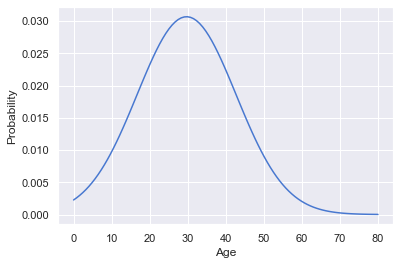

In [39]:
import scipy.stats
Age_pdf=scipy.stats.norm(0, 1)
Age_mean=29.699118
Age_std=13.002015
Age_pdf=scipy.stats.norm(Age_mean,Age_std)
x = np.linspace(0,80,100)
plt.plot(x,Age_pdf.pdf(x))
plt.xlabel("Age")
plt.ylabel("Probability")

In [40]:
NotSurvived=train_df.loc[train_df["Survived"]==0]
Survived=train_df.loc[train_df["Survived"]==1]
Age_NotSurvived=NotSurvived["Age"]
Age_NotSurvived.describe()

count    549.000000
mean      30.415100
std       12.457370
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: Age, dtype: float64

In [41]:
#计算出后验概率pdf --   p（Age|不幸存）
Age_NotSurvived_mean=30.415100
Age_NotSurvived_std=12.457370
Age_NotSurvived_pdf=scipy.stats.norm(Age_NotSurvived_mean,Age_NotSurvived_std)

In [42]:
Age_Survived=Survived["Age"]
Age_Survived.describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
#计算出后验概率pdf --   p（Age|幸存）
Age_Survived_mean=28.549778
Age_Survived_std=13.772498
Age_Survived_pdf=scipy.stats.norm(Age_Survived_mean,Age_Survived_std)

将两个后验概率绘制

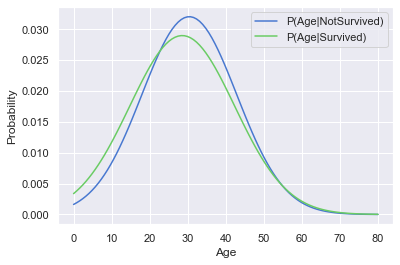

In [44]:
x = np.linspace(0,80,100)
plt.plot(x,Age_NotSurvived_pdf.pdf(x),c="b",label="P(Age|NotSurvived)")
plt.plot(x,Age_Survived_pdf.pdf(x),c="g",label="P(Age|Survived)")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend()

### 2.Fare(票价)
查表得知票价均值为32.204208，标准差49.693429

Text(0, 0.5, 'Probability')

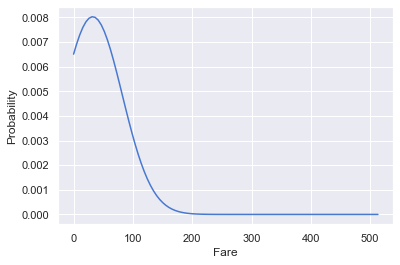

In [45]:
Fare_mean=32.204208
Fare_std=49.693429
Fare_pdf=scipy.stats.norm(Fare_mean,Fare_std)
x = np.linspace(0,513,100)
plt.plot(x,Fare_pdf.pdf(x))
plt.xlabel("Fare")
plt.ylabel("Probability")

In [46]:
Fare_NotSurvived=NotSurvived["Fare"]
Fare_NotSurvived.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [47]:
#计算出后验概率pdf --   p（Fare|不幸存）
Fare_NotSurvived_mean= 22.117887
Fare_NotSurvived_std=31.388207
Fare_NotSurvived_pdf=scipy.stats.norm(Fare_NotSurvived_mean,Fare_NotSurvived_std)

In [48]:
Fare_Survived=Survived["Fare"]
Fare_Survived.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [49]:
#计算出后验概率pdf --   p（Fare|幸存）
Fare_Survived_mean=48.395408
Fare_Survived_std=66.596998
Fare_Survived_pdf=scipy.stats.norm(Fare_Survived_mean,Fare_Survived_std)

将两个后验概率pdf绘制

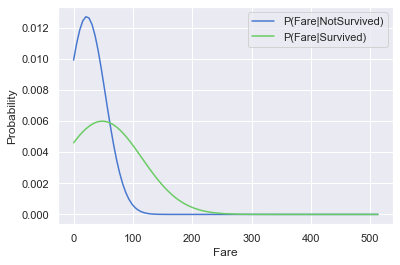

In [50]:
x = np.linspace(0,513,100)
plt.plot(x,Fare_NotSurvived_pdf.pdf(x),c="b",label="P(Fare|NotSurvived)")
plt.plot(x,Fare_Survived_pdf.pdf(x),c="g",label="P(Fare|Survived)")
plt.xlabel("Fare")
plt.ylabel("Probability")
plt.legend()

## 预测

In [51]:
#todo 在这里参考一下kaggle怎么读取数据的

In [52]:
test_df["Sex"]=Age_2_category(test_df["Sex"]).astype(int)
test_df["Embarked"]=Embarked_2_category(test_df["Embarked"]).astype(int)
test_df.info()
test_df
prior_dict
posterior_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


{'Pclass-1|NotSurvived': 0.14571948998178508,
 'Pclass-2|NotSurvived': 0.1766848816029144,
 'Pclass-3|NotSurvived': 0.6775956284153005,
 'Pclass-1|Survived': 0.39766081871345027,
 'Pclass-2|Survived': 0.2543859649122807,
 'Pclass-3|Survived': 0.347953216374269,
 'male|NotSurvived': 0.8524590163934426,
 'female|NotSurvived': 0.14754098360655737,
 'male|Survived': 0.31871345029239767,
 'female|Survived': 0.6812865497076024,
 'SibSp-0|NotSurvived': 0.7249544626593807,
 'SibSp-1|NotSurvived': 0.1766848816029144,
 'SibSp-2|NotSurvived': 0.0273224043715847,
 'SibSp-3|NotSurvived': 0.02185792349726776,
 'SibSp-4|NotSurvived': 0.0273224043715847,
 'SibSp-5|NotSurvived': 0.009107468123861567,
 'SibSp-8|NotSurvived': 0.012750455373406194,
 'SibSp-0|Survived': 0.6140350877192983,
 'SibSp-1|Survived': 0.32748538011695905,
 'SibSp-2|Survived': 0.038011695906432746,
 'SibSp-3|Survived': 0.011695906432748537,
 'SibSp-4|Survived': 0.008771929824561403,
 'SibSp-5|Survived': 0.0,
 'SibSp-8|Survived': 0.

$$P(W_i|\theta)=\frac{P(\theta|W_i)P(W_i)}{\sum_{i=1}^nP(\theta|W_i)P(W_i)}$$

In [53]:
def P_w_theta(row,w="NotSurvived"):    # P(w|Θ)
    # prepocessing
    if row["Parch"]>6:
        row["Parch"]=6
        
    #get class name
    Pclass="Pclass-{}".format(int(row["Pclass"]))
    Sex="male" if row["Sex"]==0 else "female"
    SibSp="SibSp-{}".format(int(row["SibSp"]))
    Parch="Parch-{}".format(int(row["Parch"]))
    Embarked="Embarked-{}".format(int(row["Embarked"]))
    
    # Prior Probability
    Pclass_Prior_P=prior_dict[Pclass]
    Sex_Prior_P=prior_dict[Sex]
    SibSp_Prior_P=prior_dict[SibSp]
    Parch_Prior_P=prior_dict[Parch]
    Embarked_Prior_P=prior_dict[Embarked]
    Age_Prior_P=Age_pdf.pdf(row["Age"])
    Fare_Prior_P=Fare_pdf.pdf(row["Fare"])
    
    
    # Posterior Probablility
    Pclass_Post_P=posterior_dict[Pclass+"|"+w]
    Sex_Post_P=posterior_dict[Sex+"|"+w]
    SibSp_Post_P=posterior_dict[SibSp+"|"+w]
    Parch_Post_P=posterior_dict[Parch+"|"+w]
    Embarked_Post_P=posterior_dict[Embarked+"|"+w]
    
    
    if w=="NotSurvived":      
        Age_Post_P=Age_NotSurvived_pdf.pdf(row["Age"])
        Fare_Post_P=Fare_NotSurvived_pdf.pdf(row["Fare"])
    elif w=="Survived":
        Age_Post_P=Age_Survived_pdf.pdf(row["Age"])
        Fare_Post_P=Fare_Survived_pdf.pdf(row["Fare"])
    
    Numerator=Pclass_Post_P*Sex_Post_P*SibSp_Post_P*Parch_Post_P*Embarked_Post_P*Age_Post_P*Fare_Post_P*prior_dict[w]
#     Numerator=Pclass_Post_P*prior_dict[w]
    return Numerator


In [54]:
predict_list=[]
for row in test_df.iterrows():
    row=row[1]
    NotSurvived=P_w_theta(row,"NotSurvived")
    Survived=P_w_theta(row,"Survived")
    if NotSurvived>Survived:
        predict=0
    else:
        predict=1
    predict_list.append(predict)

In [55]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict_list}).astype(int)

In [56]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission.to_csv("submission_new.csv", index=False)